<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%201/05_KNN_Hero_Kartiko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prompt : buatlah model KNN dengan dataset iris**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.datasets import load_iris
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
# Memuat dataset Iris dari sklearn
iris = load_iris()
X = iris.data  # Fitur (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (0 = setosa, 1 = versicolor, 2 = virginica)

In [ ]:
# Membagi dataset menjadi training set (70%) dan test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Melakukan standardisasi fitur agar distribusi data lebih merata
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standarisasi training set
X_test = scaler.transform(X_test)        # Standarisasi test set

# Membuat DataFrame untuk training set
training_df = pd.DataFrame(X_train, columns=iris.feature_names)
training_df['species'] = y_train  # Menambahkan kolom target
training_df['species'] = training_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Mapping target numerik ke nama spesies
print("Training Set:")
print(training_df.head())

# Membuat DataFrame untuk test set
test_df = pd.DataFrame(X_test, columns=iris.feature_names)
test_df['species'] = y_test  # Menambahkan kolom target
test_df['species'] = test_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Mapping target numerik ke nama spesies
print("\nTest Set:")
print(test_df.head())

Training Set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -1.023664         -2.378463          -0.182950         -0.293181   
1           0.695175         -0.101903           0.930661          0.737246   
2           0.924353          0.581065           1.042022          1.638870   
3           0.122229         -1.923151           0.652258          0.350836   
4           0.924353         -1.240183           1.097702          0.737246   

      species  
0  versicolor  
1   virginica  
2   virginica  
3   virginica  
4   virginica  

Test Set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.106950         -0.557215           0.707938          1.510067   
1           0.122229         -1.923151           0.095452         -0.293181   
2          -0.450718          2.629968          -1.352242         -1.323609   
3           1.611888         -0.329559           1.376105          0.737246   
4        


Test Set dengan Hasil Prediksi:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.106950         -0.557215           0.707938          1.510067   
1           0.122229         -1.923151           0.095452         -0.293181   
2          -0.450718          2.629968          -1.352242         -1.323609   
3           1.611888         -0.329559           1.376105          0.737246   
4          -1.023664          0.808721          -1.296561         -1.323609   

      species predicted_species  
0   virginica         virginica  
1  versicolor        versicolor  
2      setosa            setosa  
3   virginica         virginica  
4      setosa            setosa  
Akurasi Model K-NN: 0.98


<ipython-input-28-6e844cd9db1f>:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_df['sepal length (cm)'], test_df['sepal width (cm)'],


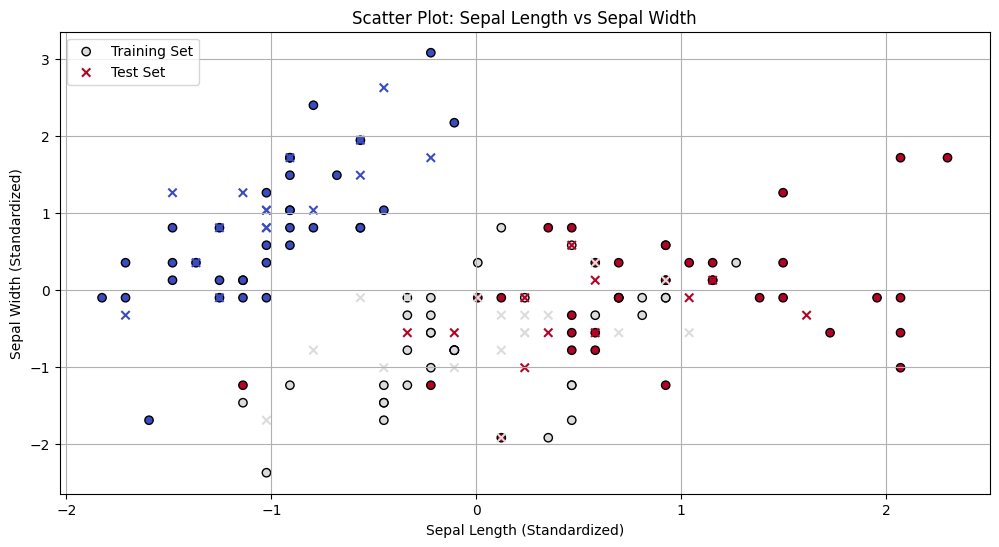

In [ ]:
# Membangun model K-NN dengan K = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model K-NN pada training set
knn.fit(X_train, y_train)

# Memprediksi hasil pada test set
y_pred = knn.predict(X_test)

# Menampilkan hasil prediksi test set pada DataFrame
test_df['predicted_species'] = y_pred  # Menambahkan kolom prediksi
test_df['predicted_species'] = test_df['predicted_species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Mapping prediksi numerik ke nama spesies
print("\nTest Set dengan Hasil Prediksi:")
print(test_df.head())

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model K-NN: {accuracy:.2f}')

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi scatter plot untuk Sepal Length dan Sepal Width
plt.figure(figsize=(12, 6))

# Scatter plot untuk training set
plt.scatter(training_df['sepal length (cm)'], training_df['sepal width (cm)'],
            c=y_train, label='Training Set', marker='o', edgecolors='k', cmap='coolwarm')

# Scatter plot untuk test set
plt.scatter(test_df['sepal length (cm)'], test_df['sepal width (cm)'],
            c=y_test, label='Test Set', marker='x', edgecolors='k', cmap='coolwarm')

# Menambahkan label dan judul
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

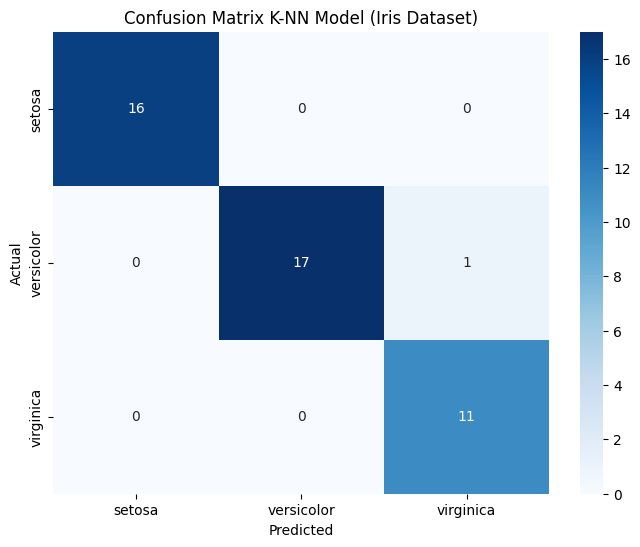

In [ ]:
# Menampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix K-NN Model (Iris Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Kesimpulan**

Kode di atas membangun model K-Nearest Neighbors (K-NN) untuk klasifikasi pada dataset Iris dan membandingkan hasil prediksi dengan nilai asli menggunakan metrik akurasi dan confusion matrix. Dataset dibagi menjadi training set (70%) dan test set (30%), kemudian fitur-fiturnya distandardisasi agar distribusi data lebih merata. Model K-NN dengan k=3 dilatih pada data training set, dan hasil prediksinya pada test set divisualisasikan dalam scatter plot untuk fitur Sepal Length dan Sepal Width. Confusion matrix juga divisualisasikan menggunakan heatmap, menunjukkan kesesuaian antara prediksi model dan nilai aktual. Model ini mencapai akurasi yang cukup baik, dengan skor akurasi yang dihitung sebesar 0.98, menunjukkan bahwa model dapat mengklasifikasikan data test set dengan sangat baik.
